<a href="https://colab.research.google.com/github/ivan-sit/CS188-Facial-Recognition-Project/blob/main/HW2(coding_part).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS245 Big Data Analytics - Assignment 2
## Deadline: 11:59PM (midnight), November 21, 2025

## Instructions
Each assignment is structured as a Jupyter notebook, offering interactive tutorials that align with our lectures. You will encounter two types of problems: *write-up problems* and *coding problems*.

1. **Write-up Problems:** These problems are primarily theoretical, requiring you to demonstrate your understanding of lecture concepts and to provide mathematical proofs for key theorems. Your answers should include sufficient steps for the mathematical derivations.
2. **Coding Problems:** Here, you will be engaging with practical coding tasks. These may involve completing code segments provided in the notebooks or developing models from scratch.

To ensure clarity and consistency in your submissions, please adhere to the following guidelines:

* For write-up problems, use Markdown bullet points to format text answers. Also, express all mathematical equations using $\LaTeX$ and avoid plain text such as `x0`, `x^1`, or `R x Q` for equations.
* For coding problems, comment on your code thoroughly for readability and ensure your code is executable. Non-runnable code may lead to a loss of **all** points. Coding problems have automated grading, and altering the grading code will result in a deduction of **all** points.
* Your submission should show the entire process of data loading, preprocessing, model implementation, training, and result analysis. This can be achieved through a mix of explanatory text cells, inline comments, intermediate result displays, and experimental visualizations.

### Collaboration and Integrity

* Collaboration is encouraged, but all final submissions must be your own work. Please acknowledge any collaboration or external sources used, including websites, papers, GitHub repositories, and large language models.
* Any suspicious cases of academic misconduct will be reported to The Office of the Dean of Students.

## Before You Start

Useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks that you are allowed to edit (between `START/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

## Part 1: KMeans (40 points + 10 bonus points)

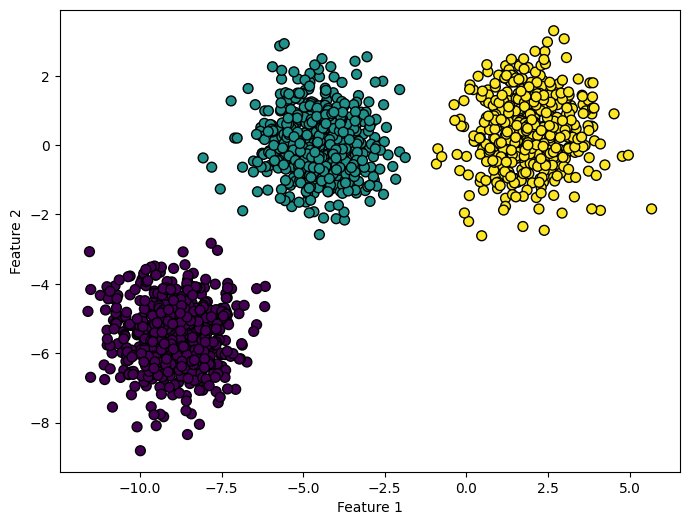

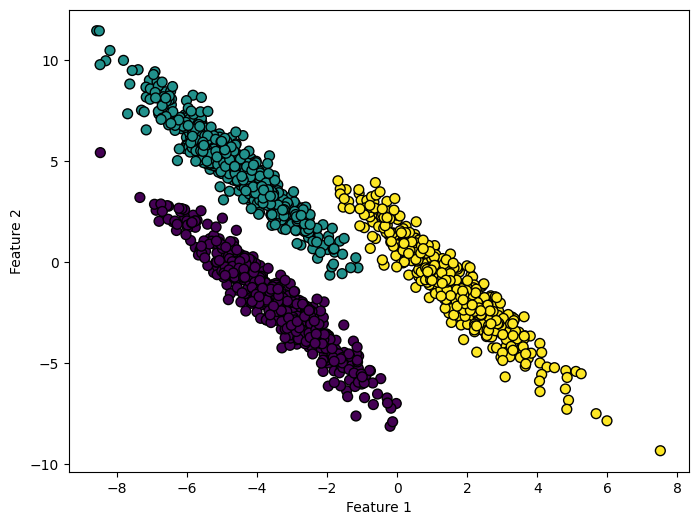

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

n_samples = 1500
random_state = 170
transformation = [[1, -1], [-1, 2]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

X = np.dot(X, transformation)  # Anisotropic blobs

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Problem 1.1: L2 Mutual Distances (5 points)

In this problem, you will implement functions to calculate the L2 mutual distances between two sets of points.

Instructions:
- Implement the `l2_mutual_distance` function to calculate the L2 mutual distances between points in `X` and `Y`.
- Visualize the similarity matrices using hierarchical clustering with `seaborn.clustermap`.

Hints:
- An example implementation of `l1_mutual_distance` function to calculate the L1 mutual distances has been provided.
- Use `np.expand_dims` to add new dimensions to the arrays for broadcasting.
- Use `np.abs` for L1 distance and `np.square` for L2 distance.
- Use `np.sum` with `axis=-1` to sum along the last dimension.

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


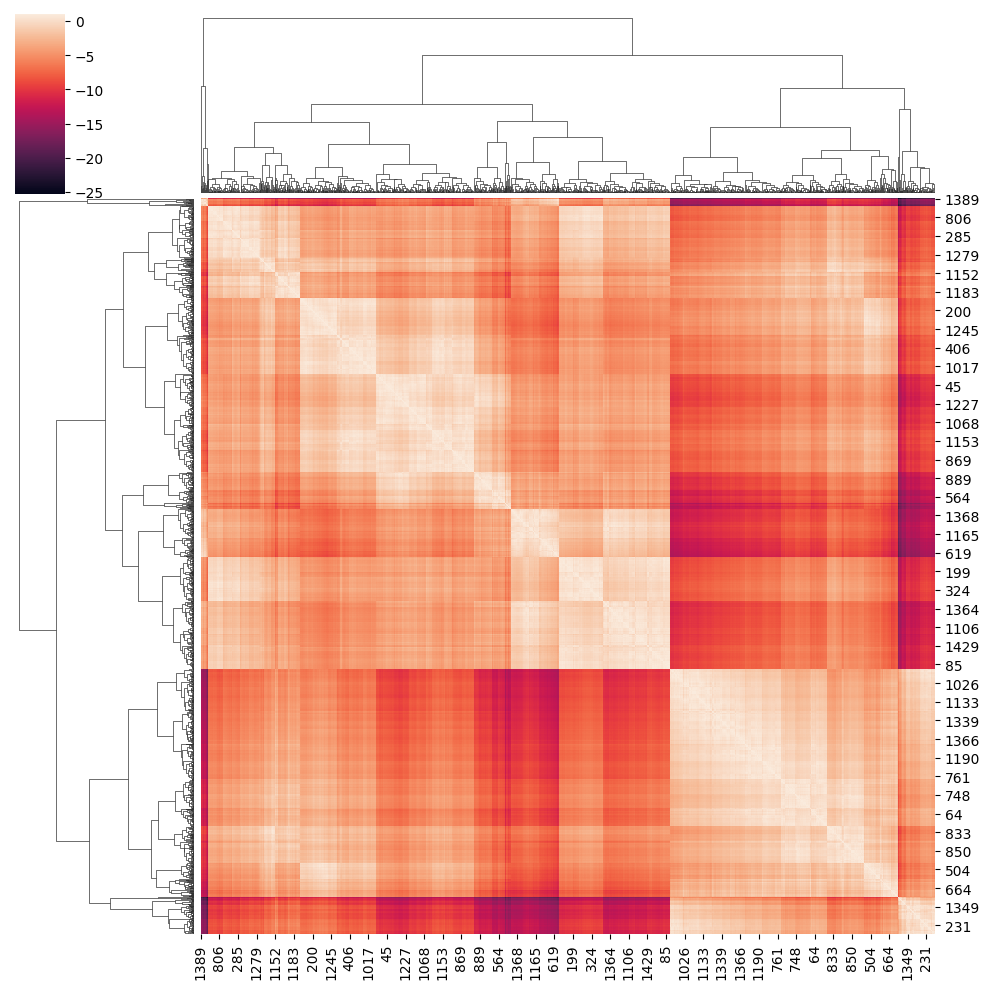

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


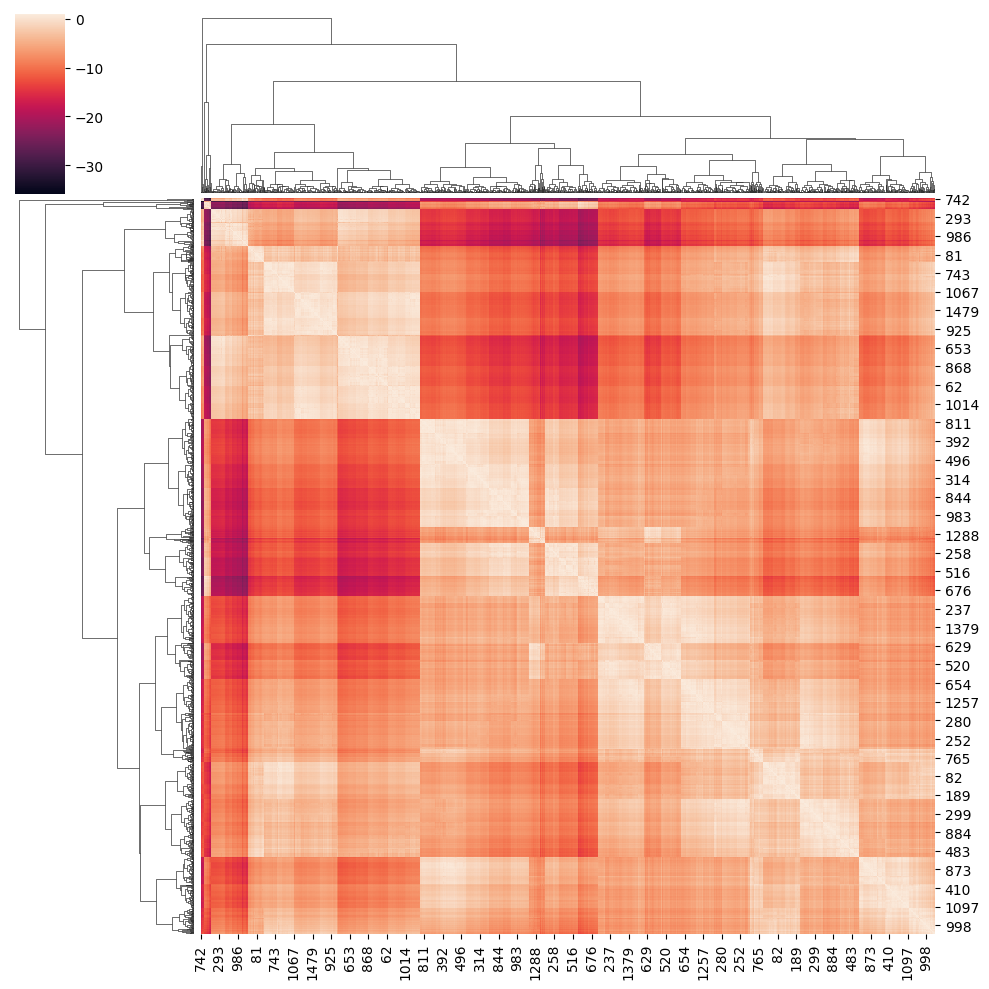

In [2]:
def l1_mutual_distance(X, Y):
    """
        X: ndarray [s, ndim]
        Y: ndarray [t, ndim]
    """
    X_expand = np.expand_dims(X, axis=1) # X_expand: [s, 1, ndim]
    Y_expand = np.expand_dims(Y, axis=0) # Y_expand: [1, t, ndim]
    mutual_square = np.abs(X_expand - Y_expand) # [s, t, ndim]
    return mutual_square.sum(axis=-1) # [s, t]


def l2_mutual_distance(X, Y):
    """
        X: ndarray [s, ndim]
        Y: ndarray [t, ndim]
    """
    # START YOUR CODE HERE
    X_expand = np.expand_dims(X, axis=1)
    Y_expand = np.expand_dims(Y, axis=0)
    mutual_square = np.square(X_expand - Y_expand)  # [s, t, ndim]
    # END YOUR CODE HERE

    return np.sqrt(mutual_square.sum(axis=-1))

# Visualize similarity matrices using hierarchical clustering
sim = 1 - l2_mutual_distance(X, X)
sns.clustermap(sim)
plt.show()

sim = 1 - l1_mutual_distance(X, X)
sns.clustermap(sim)
plt.show()

### Problem 1.2: KMeans Clustering with L2 Distance (10 points)

In this problem, you will implement the KMeans clustering algorithm using L2 distance.

Instructions:
- Complete the `k_means_clustering` function to perform KMeans clustering on the input data `X` with `k` clusters.
- Implement the assignment step to assign each point to the nearest centroid.
- Implement the update step to update the centroids based on the assigned points.
- Repeat the assignment and update steps until convergence or maximum iterations are reached.
- Plot the average distance to cluster centers over iterations.
- Apply the implemented KMeans clustering on the provided dataset and visualize the results.

Hints:
- Use `np.argmin` to find the index of the nearest centroid for each point.
- Use `np.mean` to update the centroids based on the assigned points.
- Use `np.all` to check for convergence.

Stop at iter 4


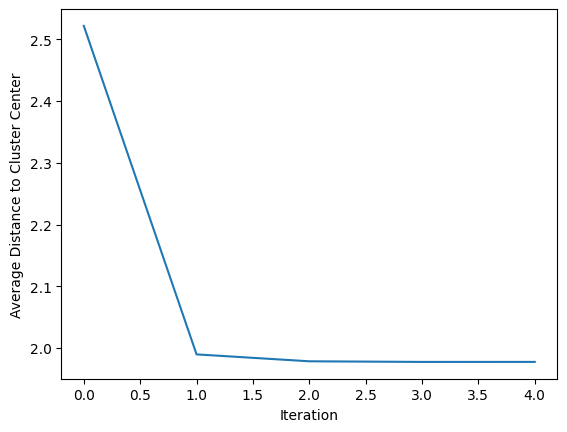

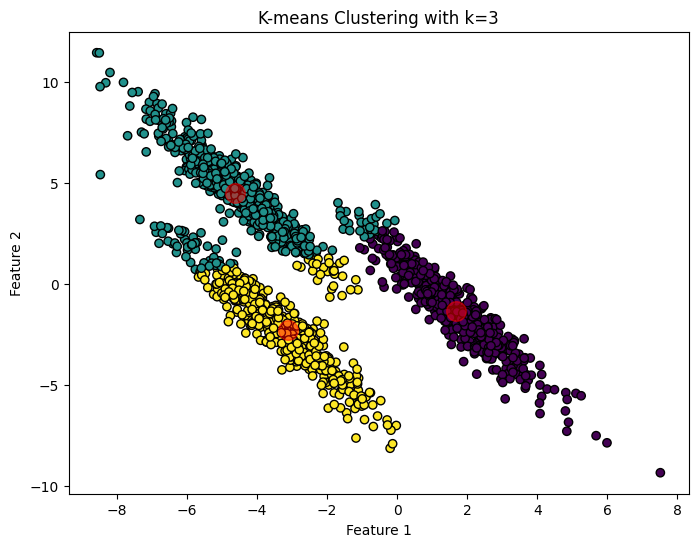

Stop at iter 12


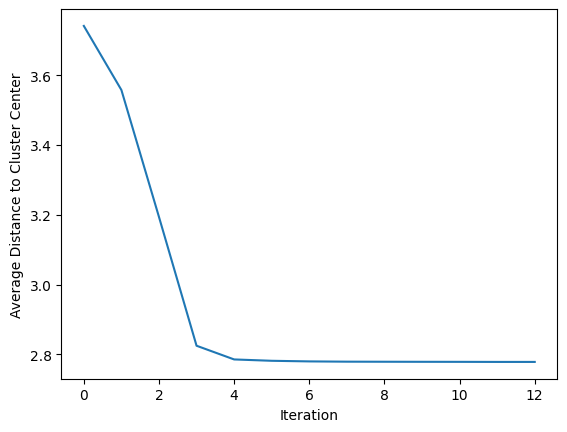

Stop at iter 14


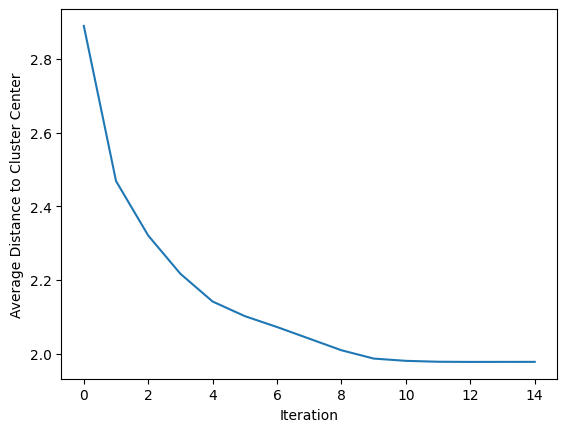

Stop at iter 17


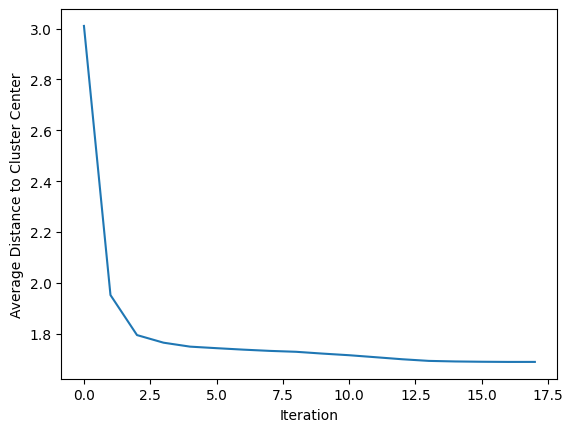

Stop at iter 11


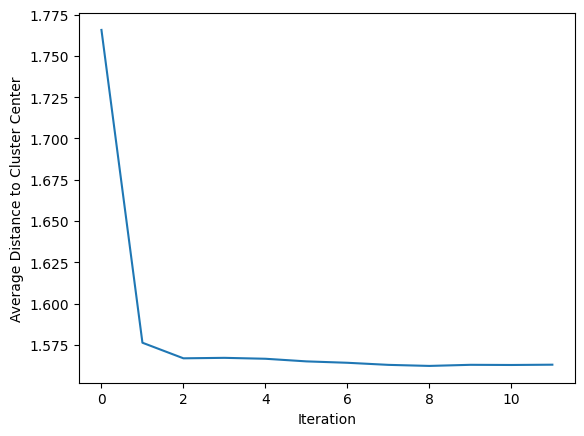

Stop at iter 23


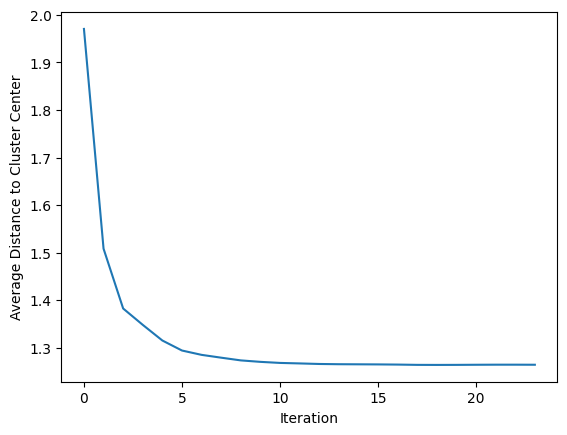

Stop at iter 16


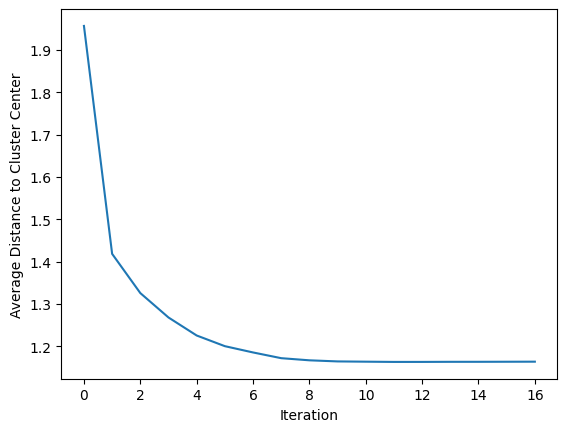

Stop at iter 12


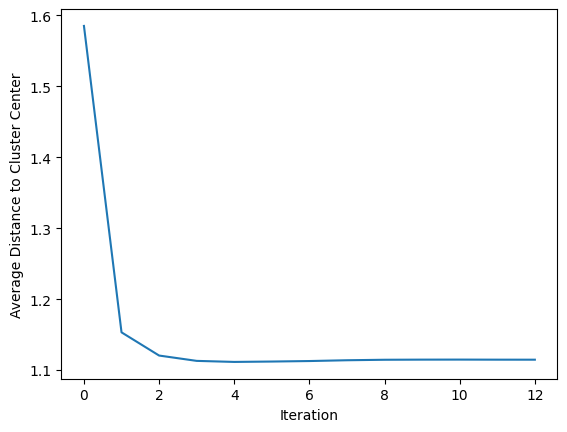

Stop at iter 16


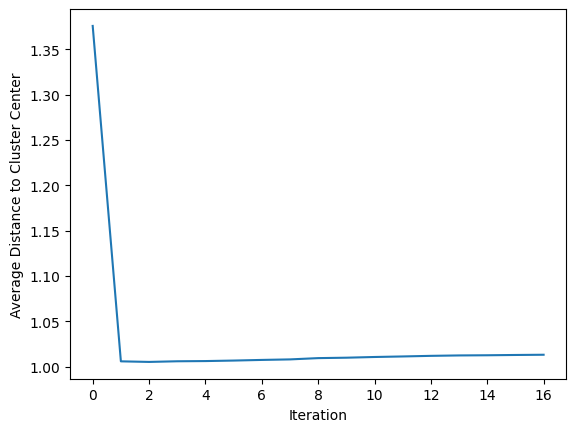

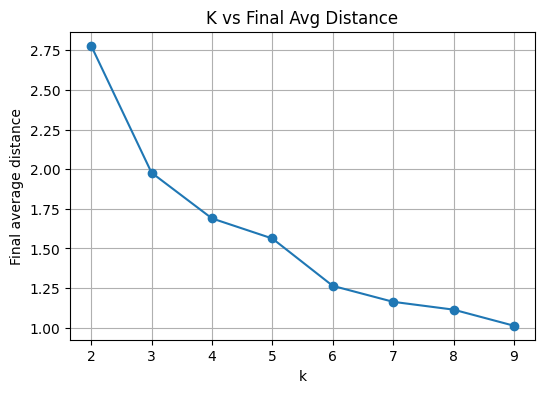

[(2, np.float64(2.778048347676988)), (3, np.float64(1.9776559298446916)), (4, np.float64(1.6896601846176635)), (5, np.float64(1.563024786565563)), (6, np.float64(1.264617984744338)), (7, np.float64(1.1639266035098004)), (8, np.float64(1.114687943988813)), (9, np.float64(1.0132683852473179))]


In [3]:
def k_means_clustering(X, k, max_iters=100):
    # Step 1: Initialize centroids randomly from the data points
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]
    distance_per_iteration = []

    for iter_idx in range(max_iters):
        # Step 2: Assignment step
        distances = l2_mutual_distance(X, centroids)  # Calculate distances between X and centroids
        # START YOUR CODE HERE
        closest_cluster = np.argmin(distances, axis=1)  # cluster index per point
        # Track average distance to the assigned centroid for plotting
        distance_per_iteration.append(
            np.mean(distances[np.arange(X.shape[0]), closest_cluster])
        )
        # END YOUR CODE HERE


        # Step 3: Update step
        # START YOUR CODE HERE
        new_centroids = []
        for i in range(k):
            pts = X[closest_cluster == i]
            if len(pts) == 0:
                # keep old centroid if a cluster is empty
                new_centroids.append(centroids[i])
            else:
                new_centroids.append(np.mean(pts, axis=0))
        new_centroids = np.vstack(new_centroids)
        # END YOUR CODE HERE


        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            print('Stop at iter %d' % iter_idx)
            break

        centroids = new_centroids

    plt.plot(distance_per_iteration)
    plt.xlabel('Iteration')
    plt.ylabel('Average Distance to Cluster Center')
    plt.show()

    return closest_cluster, centroids, distance_per_iteration


# Apply K-means to the two-moons dataset with k=2
k = 3
clusters_kmeans, centroids_kmeans, dist_hist = k_means_clustering(X, k)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis', edgecolors='k')
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, alpha=0.5)
plt.title("K-means Clustering with k=%d" % k)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# for question 1.3.1
k_list = [n for n in range(2,10)]
final_avg = []

for k in k_list:
    clusters_kmeans, centroids_kmeans, dist_hist = k_means_clustering(X, k)
    final_avg.append(dist_hist[-1])

plt.figure(figsize=(6,4))
plt.plot(k_list, final_avg, marker='o')
plt.xlabel('k')
plt.ylabel('Final average distance')
plt.title('K vs Final Avg Distance')
plt.grid(True)
plt.show()

print(list(zip(k_list, final_avg)))

Stop at iter 12


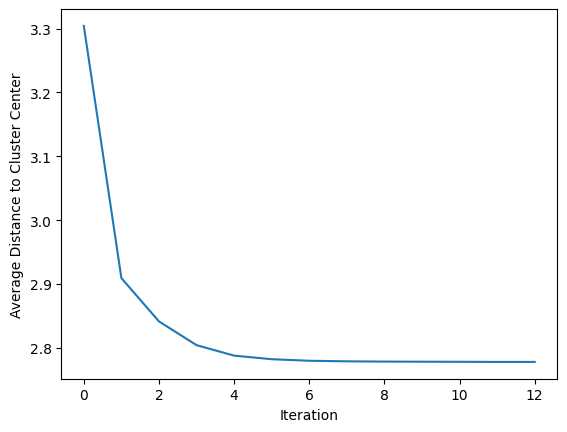

Stop at iter 12


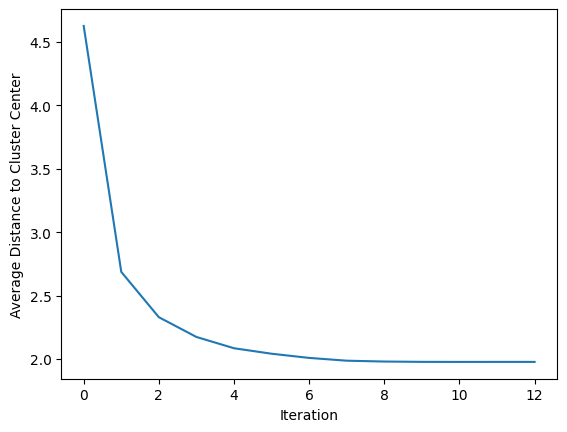

Stop at iter 15


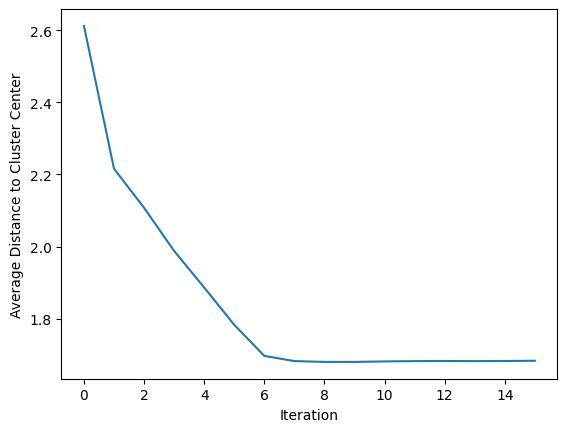

Stop at iter 15


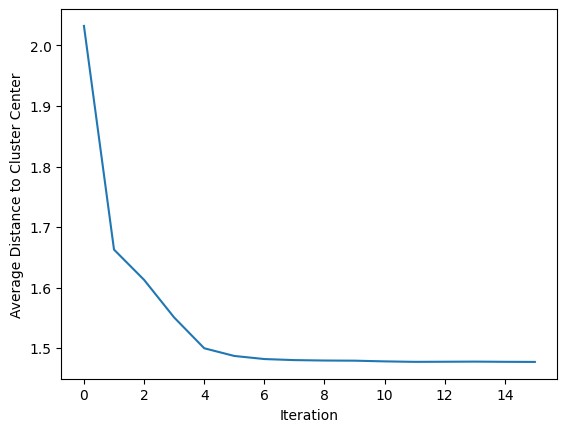

Stop at iter 22


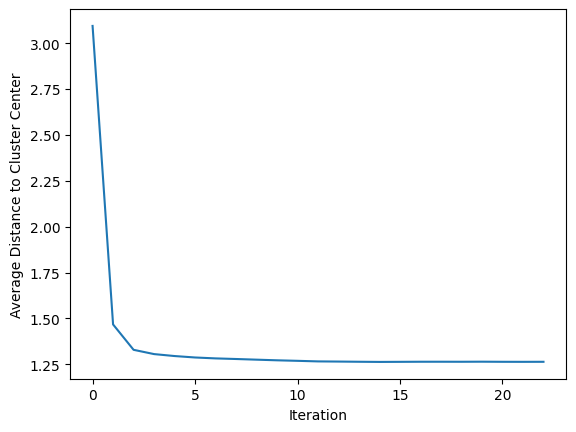

Stop at iter 18


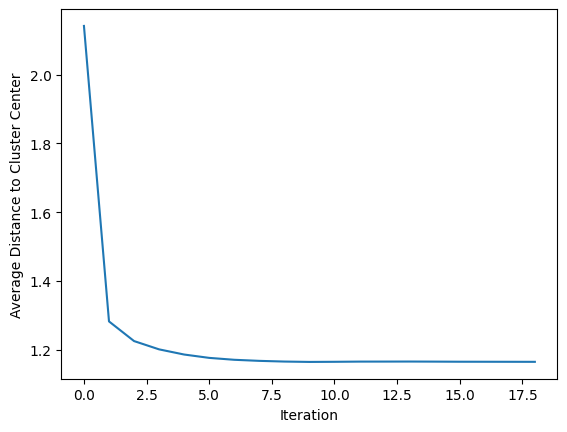

Stop at iter 33


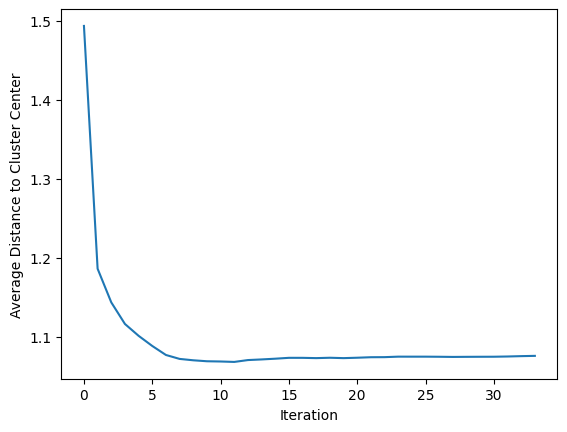

Stop at iter 62


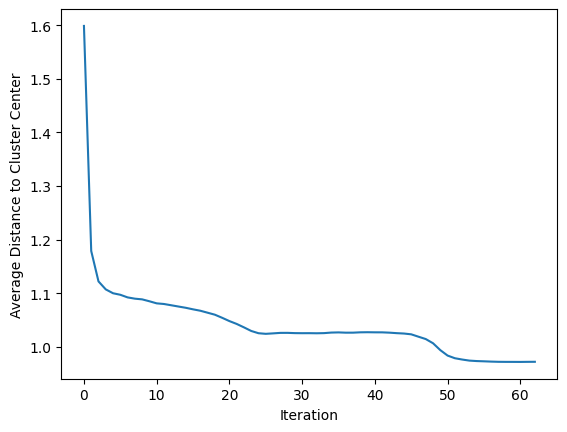

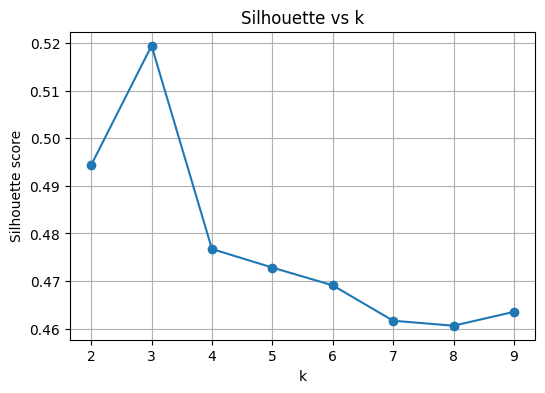

Best k by silhouette: 3


In [4]:
#1.3.2
from sklearn.metrics import silhouette_score

k_range = range(2, 10)
sil_scores = []

for k in k_range:
    labels, centroids, dist_hist = k_means_clustering(X, k)
    sil_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(6,4))
plt.plot(list(k_range), sil_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette vs k')
plt.grid(True)
plt.show()

best_k = list(k_range)[int(np.argmax(sil_scores))]
print("Best k by silhouette:", best_k)

Stop at iter 16


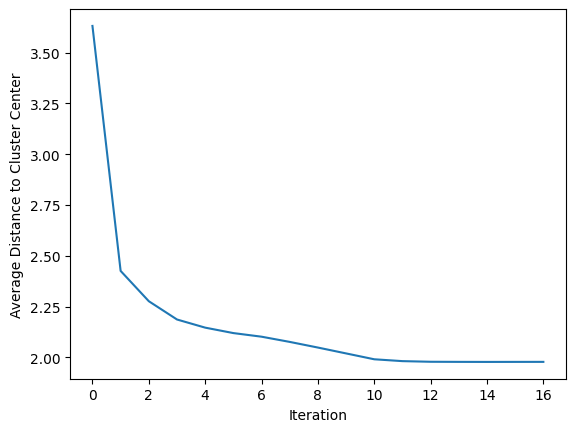

Stop at iter 28


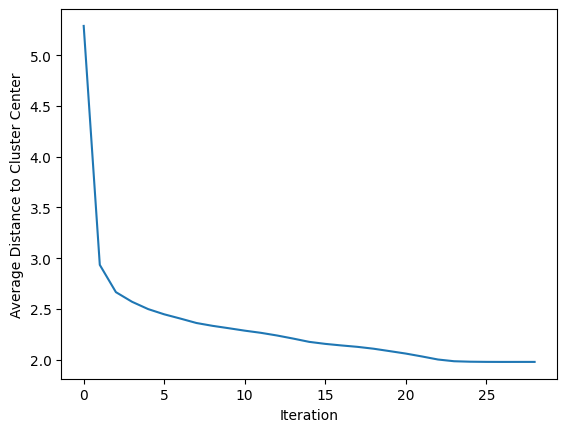

Stop at iter 6


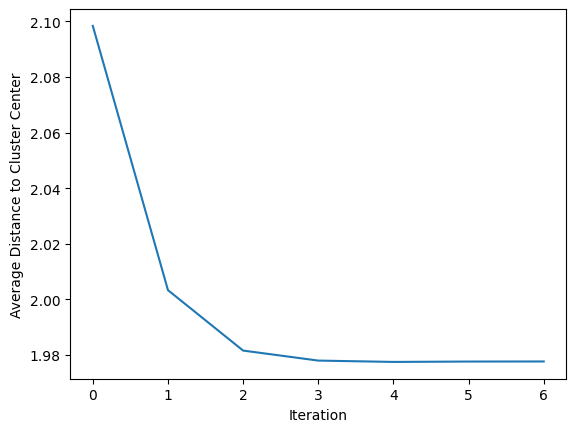

Stop at iter 26


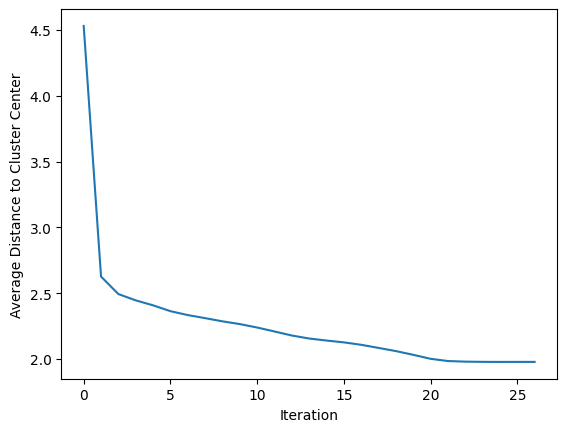

Stop at iter 26


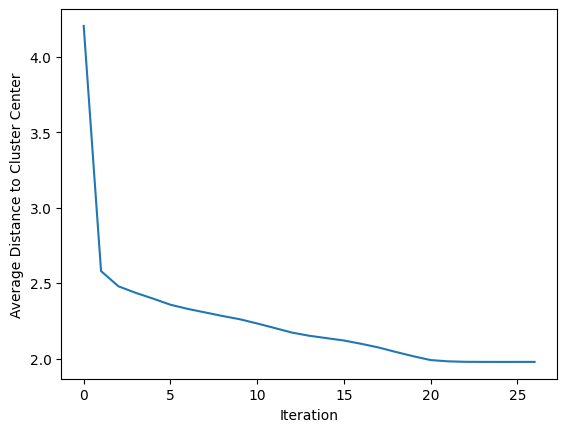

Stop at iter 22


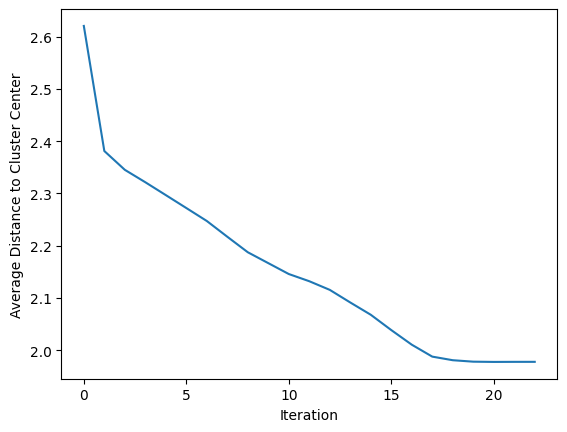

Stop at iter 7


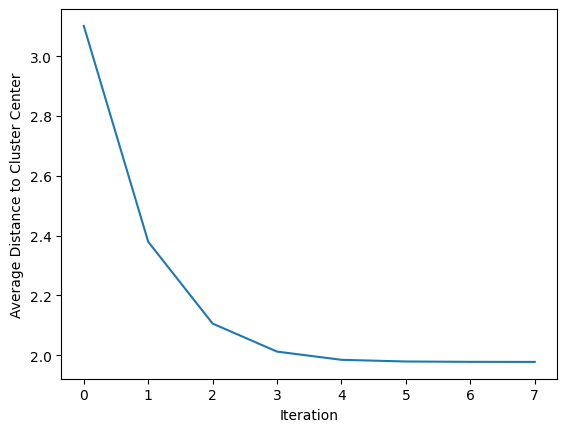

Stop at iter 25


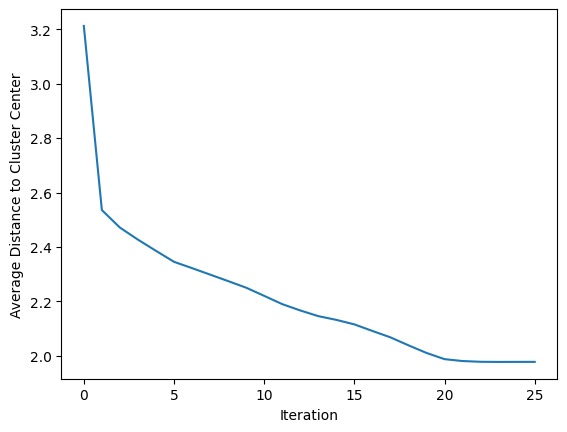

Stop at iter 24


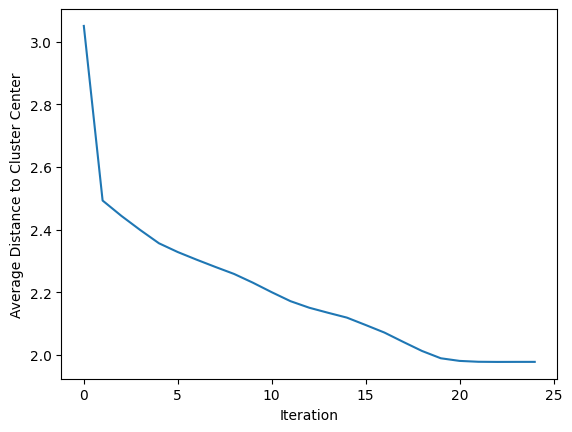

Stop at iter 5


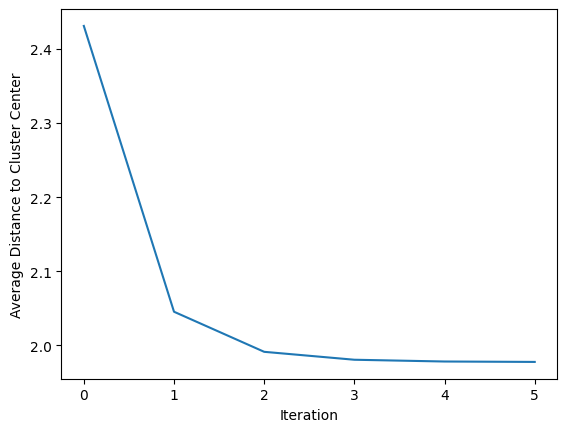

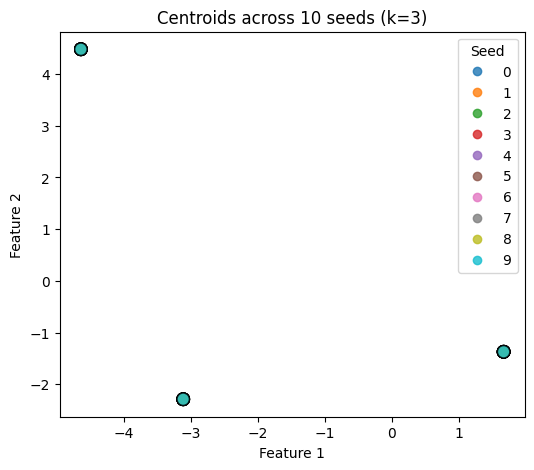

In [5]:
#1.3.3
k = 3
seeds = range(10)

all_centroids = []
for s in seeds:
    np.random.seed(s)
    _, cents, _ = k_means_clustering(X, k)
    all_centroids.append(cents)

all_centroids = np.vstack(all_centroids)
seed_ids = np.repeat(list(seeds), k)

plt.figure(figsize=(6,5))
sc = plt.scatter(all_centroids[:, 0], all_centroids[:, 1],
                 c=seed_ids, cmap='tab10', s=80, edgecolors='k', alpha=0.8)
plt.title(f'Centroids across {len(seeds)} seeds (k={k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(*sc.legend_elements(), title="Seed")
plt.show()

### Problem 1.3: Parameter Studies (15 points)

For each of the below questions, provide your code and a brief explanation.

1. Try running K-Means with different values of `n_clusters`. How does the final "average distance" change with different `n_clusters`? Why? What if we set `n_clusters = n_points`, what is the lowest average distance in that case?

Answer: For k ∈ {2,…,9}, the final average distance drops as k grows because more centroids shrink within-cluster distortion.
In the limit n_clusters = n_points, each point is its own centroid, so the average distance reaches 0.

2. Use `from sklearn.metrics import silhouette_samples, silhouette_score` to determine the optimal `n_clusters` for this problem. You can refer to the [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) for guidance.

Answer: The optimal number of clusters is k=3, indicating the best separation. Higher k values results in over-clustering.

3. Try running KMeans with different initialization (random seeds) and record the centroids over 10 rounds. Plot these centroids using `plt.scatter`. Are they the same? Why?

Answer: The centroids are the same across all 10 seeds because the data has three well-separated clusters. K-means converges to the same global optimum regardless of initialization, indicating a stable clustering solution.

### Problem 1.4: Convergence (10 points)

Prove that the K-Means clustering algorithm converges in a finite number of steps.


1. **Objective Function**  
   **Sub-question**: What is the objective function that K-Means minimizes? How does this function change after each iteration?  
   **Hint**: Consider the within-cluster sum of squares (WCSS):
   $$
   J = \sum_{i=1}^k \sum_{x \in C_i} \|x - \mu_i\|^2
   $$
   Explore how this function behaves during each step of the algorithm. How do the assignment and update steps influence the value of $J$?

   Answer: K‑means minimizes within-cluster sum of squares (WCSS). Each full iteration (assignment + update) can only lower or keep J.

2. **Bounding the Objective**  
   **Sub-question**: What is the smallest possible value the objective function $J$ can take? What does this imply about the number of iterations?  
   **Hint**: Think about the range of possible values for $J$. How does the fact that the objective is non-negative affect the number of iterations?

   Answer:  $J \ge 0$. With each iteration non‑increasing J and bounded below by 0, it cannot decrease indefinitely.

3. **Monotonic Decrease in Steps**  
   **Sub-question**: Why does the objective function either decrease or remain constant after each iteration?  
   **Hint**: Analyze both the assignment and centroid update steps. How does each step attempt to minimize the distance between points and centroids?

   Answer:
   
   1. Assignment step: fixing centroids, assigning each point to its nearest centroid gives the minimum possible cost for that centroid set, so J does not increase.
   2. Update step: fixing assignments, setting each centroid to the mean of its cluster minimizes the sum of squared distances in that cluster, so J does not increase.

4. **Finite Configurations**  
   **Sub-question**: Why can the algorithm only run for a finite number of steps?  
   **Hint**: Consider the number of possible assignments of $n$ points to $k$ clusters. Why does the algorithm eventually stabilize after some iterations?

   Answer: Only finitely many assignments of n points to k clusters exist ($k^n$). Because J is non‑increasing and assignments can’t repeat with a lower J, the algorithm must reach a stable assignment and centroid set in a finite number of iterations.

### Problem 1.5: Convergence with $L_1$ Distance (10 bonus points)

Prove that K-Means still converges in a finite number of steps when using the $L_1$ (Manhattan) distance instead of the $L_2$ (Euclidean) distance.

**Hint**: Reformulate the objective function using the $L_1$ distance:
$$
J_{L1} = \sum_{i=1}^k \sum_{x \in C_i} \|x - \mu_i\|_1
$$
Investigate whether the properties that guarantee convergence under the $L_2$ norm (monotonic decrease, boundedness, and finite configurations) still hold under the $L_1$ norm. Can the same reasoning apply for this different distance metric?

Answer:

**Objective (L1)**
$$
J_{L1} = \sum_{i=1}^k \sum_{x \in C_i} \lVert x - \mu_i \rVert_1 = \sum_{i=1}^k \sum_{x \in C_i} \sum_{d=1}^D |x_d - \mu_{i,d}|.
$$

**Assignment step (non-increasing)**
With centroids fixed, assigning each $x$ to its nearest centroid in $\lVert\cdot\rVert_1$ minimizes $\min_i \lVert x - \mu_i \rVert_1$, so $J_{L1}$ cannot increase.

**Update step (non-increasing)**
With assignments fixed, for each cluster $C_i$ and coordinate $d$, the minimizer of $\sum_{x \in C_i} |x_d - \mu_{i,d}|$ is any median of $\{x_d : x \in C_i\}$. Setting $\mu_{i,d}$ to that median yields the L1-optimal centroid, so $J_{L1}$ does not increase.

**Bounded below**
$J_{L1} \ge 0$ (sum of absolute values).

**Finite configurations**
There are at most $k^n$ point-to-cluster assignments. Because $J_{L1}$ is non-increasing and evaluated on finitely many assignment states (with medians), the algorithm must reach a stable assignment/centroid set in finitely many iterations.

**Conclusion:** With L1 distance and centroid updates to per-cluster coordinatewise medians, $J_{L1}$ is non-increasing, bounded below, and evaluated over finitely many assignments. Therefore K-means under L1 converges in a finite number of steps.

## Part 2: The Transformer Model (80 points)

In this assignment, you will build a Transformer model from scratch using PyTorch. This exercise aims to deepen your understanding of the Transformer architecture, as introduced by Vaswani et al. in the landmark paper [*Attention is All You Need*](https://arxiv.org/abs/1706.03762). By implementing the various components of the Transformer, you will gain hands-on experience with key concepts such as self-attention mechanisms, positional encoding, and the overall architecture of the Transformer model.

### Key Components of the Transformer

<center></center>

1. **Encoder and Decoder**: The Transformer model consists of an encoder to process the input text and a decoder to generate the output text. Both the encoder and decoder are composed of multiple layers that contain self-attention and feed-forward neural network components.
2. **Multi-Head Attention**: This component allows the model to jointly attend to information from different representation subspaces at different positions. Implementing multi-head attention is a critical part of this assignment.
3. **Positional Encoding**: Since the model contains no recurrence or convolution, positional encodings are added to give the model some information about the relative or absolute position of the tokens in the sequence.
4. **Feed-Forward Networks**: Each layer of the encoder and decoder contains a feed-forward neural network which applies two linear transformations and a ReLU activation in between.

In the following sections, you will implement these components step by step.

### GPU Support

 You can use [Google Colab](https://colab.research.google.com/) or a GPU server for this exercise. If you are using Colab, you can manually switch to a CPU device on Colab by clicking `Runtime -> Change runtime type` and selecting `GPU` under `Hardware Accelerator`.

In [6]:
import torch

USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
elif USE_GPU and torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

In [7]:
print('Using device:', device)

Using device: cuda


### Problem 2.1: Multi-Head Attention (20 points)

The attention mechanism computes the dot product between the query and key vectors, scaled by the square root of the dimension of the key vectors. The attention weights are then used to compute a weighted sum of the value vectors.
Please implement the `scaled_dot_product_attention` function at first, which will used as a building block for the multi-head attention mechanism. This function computes the attention weights and the weighted sum of the value vectors, given the projected query, key, and value vectors.

In [8]:
import math
def scaled_dot_product_attention(query, key, value, mask=None):
    """
    Compute the scaled dot product attention.

    Parameters:
    - query (torch.Tensor): Queries tensor with shape (batch_size, num_heads, seq_len_q, depth).
    - key (torch.Tensor): Keys tensor with shape (batch_size, num_heads, seq_len_k, depth).
    - value (torch.Tensor): Values tensor with shape (batch_size, num_heads, seq_len_v, depth).
    - mask (torch.Tensor, optional): Mask tensor to filter out certain positions before
      applying softmax. The mask's shape is broadcastable to (batch_size, num_heads, seq_len_q, seq_len_k).
      The mask will contain either 0 values to indicate that the corresponding token in the input sequence
      should be considered in the computations or a 1 to indicate otherwise.

    Returns:
    - torch.Tensor: The output after applying attention to the value vector. Shape is (batch_size, num_heads, seq_len_q, depth).
    - torch.Tensor: The attention weights. Shape is (batch_size, num_heads, seq_len_q, seq_len_k).
    """

    # TODO: Compute the matrix multiplication between the query and key tensors
    # Hint: The resulting tensor has shape (batch_size, num_heads, seq_len_q, seq_len_k)
    matmul_qk = torch.matmul(query, key.transpose(-2, -1))

    # TODO: Scale the attention weights by the dimension of the key
    dk = key.size(-1)
    scaled_scores = matmul_qk / math.sqrt(dk)

    # TODO: Apply the mask to the scaled tensor
    # Hint: You can use the `masked_fill` method of the tensor and mask out
    #   certain positions to a large negative number (e.g., -1e9)
    #   such that the attention weights will be zero after applying softmax
    if mask is not None:
      scaled_scores = scaled_scores.masked_fill(mask.bool(), float('-inf'))
    # TODO: Apply the softmax function to obtain the attention weights
    attention_weights = torch.softmax(scaled_scores, dim=-1)
    attention_weights = torch.nan_to_num(attention_weights, nan=0.0)
    # TODO: Apply the attention weights to the value tensor
    output = torch.matmul(attention_weights, value)
    output = torch.nan_to_num(output, nan=0.0)
    return output, attention_weights


You can verify your implementation by running the test cases provided.

In [9]:
batch_size = 4
num_heads = 8
seq_len_q = 10
seq_len_k = 10
seq_len_v = 10
depth = 128

query = torch.rand(batch_size, num_heads, seq_len_q, depth)
key = torch.rand(batch_size, num_heads, seq_len_k, depth)
value = torch.rand(batch_size, num_heads, seq_len_v, depth)

output, attention_weights = scaled_dot_product_attention(query, key, value)

assert output.shape == (batch_size, num_heads, seq_len_q, depth)
assert attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)

from torch.nn.functional import scaled_dot_product_attention as torch_scaled_dot_product_attention
from torch.testing import assert_close

torch_output = torch_scaled_dot_product_attention(query, key, value)
assert_close(output, torch_output, rtol=1e-6, atol=1e-6)

In Transformers, there are multiple "attention heads", each of which captures a different aspect of the input.
At first, the query and key vectors are passed through a linear layer to project them to a higher-dimensional space. Then, the scaled dot-product attention is applied to each of these projected versions of the query and key vectors. The output of the linear layer is then reshaped to split the attention heads. The attention weights are computed for each head, and the weighted sum is then concatenated and passed through another linear layer to produce the final output.
Please implement the `MultiHeadAttention` class, which contains the logic for the multi-head attention mechanism.

In [10]:
class MultiHeadAttention(torch.nn.Module):
    """
    Multi-Head Attention module takes in queries, keys, and values, and
    performs scaled dot-product attention on them. This implementation also
    supports masking irrelevant positions.

    Parameters:
    - d_model (int): The dimension of the input embedding vectors.
    - num_heads (int): The number of attention heads. d_model must be divisible by num_heads.

    The architecture splits the input embedding vector into multiple heads because
    it allows the model to jointly attend to information from different representation
    subspaces at different positions. After the attention is applied, the heads are
    concatenated and linearly transformed back to the original d_model dimension.
    """

    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        assert d_model % self.num_heads == 0
        self.depth = d_model // self.num_heads

        self.wq = torch.nn.Linear(d_model, d_model)
        self.wk = torch.nn.Linear(d_model, d_model)
        self.wv = torch.nn.Linear(d_model, d_model)
        self.dense = torch.nn.Linear(d_model, d_model)

    def split_heads(self, x, batch_size):
        """
        Split the last dimension of the input into (num_heads, depth).
        Transpose the result such that the shape becomes (batch_size, num_heads, seq_len, depth)
        to prepare for parallel computation of attention heads.

        Parameters:
        - x (torch.Tensor): The input tensor.
        - batch_size (int): Batch size for reshaping.

        Returns:
        - torch.Tensor: The reshaped tensor with dimensions (batch_size, num_heads, seq_len, depth).
        """

        x = x.view(batch_size, -1, self.num_heads, self.depth).transpose(1, 2)
        return x

    def forward(self, q, k, v, mask=None):
        """
        The forward pass for the Multi-Head Attention layer.

        Parameters:
        - q, k, v (torch.Tensor): Queries, keys, and values respectively. These tensors have shapes
          (batch_size, seq_len, d_model).
        - mask (torch.Tensor, optional): The mask tensor can be used to mask out (ignore) certain positions
          during the attention mechanism. This is useful for masking padded positions in the input
          sequences or to enforce causality in decoder self-attention. The shape of the mask tensor
          should be (batch_size, 1, 1, seq_len) for padding mask, or (batch_size, 1, seq_len, seq_len)
          for look-ahead mask.

        Returns:
        - torch.Tensor: The output after applying multi-head attention. Shape is (batch_size, seq_len, d_model).
        - torch.Tensor: The attention weights. Shape is (batch_size, num_heads, seq_len, seq_len).
        """

        batch_size = q.size(0)
        q = self.split_heads(self.wq(q), batch_size)
        k = self.split_heads(self.wk(k), batch_size)
        v = self.split_heads(self.wv(v), batch_size)

        output, attention_weights = scaled_dot_product_attention(q, k, v, mask)

        # TODO: Concatenate multiple attention heads
        # Hint: The shape of the output should be (batch_size, seq_len, d_model)
        output = output.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        output = self.dense(output)
        return output, attention_weights


### Problem 2.2: Positional Encoding (20 points)

Positional Encoding is a method used to inject some information about the relative or absolute position of the tokens in the sequence. The positional encodings have the same dimension as the embeddings so that the two can be summed. There are many choices of positional encodings, learned and fixed. In this assignment, you will implement the fixed positional encoding as described in the following equations:

$$
\begin{align}
    PE_{(pos, 2i)} & = \sin(pos/10000^{2i/d_{model}}), \\
    PE_{(pos, 2i+1)} & = \cos(pos/10000^{2i/d_{model}}),
\end{align}
$$
where $pos$ is the word position and $i$ is the embedding dimension.

In [11]:
class PositionalEncoding(torch.nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)

        # TODO: Use the formula given in the original paper to compute the positional encodings
        # Hint: Remember to add one more dimension to the encoding tensor so that it can be broadcasted
        #   to (batch_size, max_len, d_model) when added to the input tensor
        div_term = torch.exp(torch.arange(0, d_model, 2, dtype=torch.float32) * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # (1, max_len, d_model) for broadcasting
        self.register_buffer('pe', pe)

    def forward(self, x):
        # TODO: Apply the positional encoding to the input tensor
        x = x + self.pe[:, :x.size(1), :]
        return x

### Problem 2.3: Encoder and Decoder (20 points)

This section would involve more detailed implementation, including the sub-layer connections, normalization, and how they are combined to form the complete encoder and decoder architecture. Specifically, you will implement the following components:
- `EncoderLayer`, which contains a multi-head attention layer and a feed-forward neural network, each followed by a residual connection and layer normalization.
- `DecoderLayer`, which contains three sub-layers: masked multi-head attention, multi-head attention, and a feed-forward neural network, each followed by a residual connection and layer normalization.

In [12]:
def pointwise_feedforward_network(d_model, dff):
    return nn.Sequential(
        nn.Linear(d_model, dff),
        nn.ReLU(),
        nn.Linear(dff, d_model)
    )

In [13]:
class EncoderLayer(torch.nn.Module):
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        """
        Initialize an EncoderLayer.

        Parameters:
        - d_model (int): The dimensionality of the model.
        - num_heads (int): The number of attention heads.
        - dff (int): The dimensionality of the feed-forward network model.
        - dropout_rate (float): The dropout rate.
        """
        super(EncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = pointwise_feedforward_network(d_model, dff)

        self.layernorm1 = torch.nn.LayerNorm(d_model)
        self.layernorm2 = torch.nn.LayerNorm(d_model)

        self.dropout1 = torch.nn.Dropout(dropout_rate)
        self.dropout2 = torch.nn.Dropout(dropout_rate)

    def forward(self, x, mask):
        """
        The forward pass for the EncoderLayer.

        Parameters:
        - x (Tensor): Input tensor to the encoder layer.
        - mask (Tensor, optional): The mask for padding tokens to ignore during self-attention.

        Returns:
        - Tensor: The output of the encoder layer.
        """
        # TODO: Step 1: Apply multi-head attention (with padding mask) and add & norm
        attn_output, _ = self.mha(x, x, x, mask)  # (B, seq, d_model)
        out1 = self.layernorm1(x + self.dropout1(attn_output))

        # TODO: Step 2: Apply the feed-forward network and add & norm
        ffn_output = self.ffn(out1)
        out2 = self.layernorm2(out1 + self.dropout2(ffn_output))
        return out2

In [14]:
class DecoderLayer(torch.nn.Module):
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        """
        Initialize a DecoderLayer.

        Parameters:
        - d_model (int): The dimensionality of the model, i.e., the size of the input and output embeddings.
        - num_heads (int): The number of attention heads.
        - dff (int): The dimensionality of the feed-forward network model.
        - dropout_rate (float): The dropout rate.
        """
        super(DecoderLayer, self).__init__()
        self.mha1 = MultiHeadAttention(d_model, num_heads)  # Self-attention
        self.mha2 = MultiHeadAttention(d_model, num_heads)  # Cross-attention

        self.ffn = pointwise_feedforward_network(d_model, dff)

        self.layernorm1 = torch.nn.LayerNorm(d_model)
        self.layernorm2 = torch.nn.LayerNorm(d_model)
        self.layernorm3 = torch.nn.LayerNorm(d_model)

        self.dropout1 = torch.nn.Dropout(dropout_rate)
        self.dropout2 = torch.nn.Dropout(dropout_rate)
        self.dropout3 = torch.nn.Dropout(dropout_rate)

    def forward(self, x, enc_output, look_ahead_mask=None, padding_mask=None):
        """
        The forward pass for the DecoderLayer.

        Parameters:
        - x (Tensor): Input tensor for decoder layer.
        - enc_output (Tensor): Output from the encoder (serves as Key and Value for cross attention).
        - look_ahead_mask (Tensor, optional): The mask for future tokens in a sequence within the self-attention mechanism.
        - padding_mask (Tensor, optional): The mask for padding tokens within the encoder output.
        """
        # TODO: Step 1: Self attention with look ahead mask and padding mask
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        out1 = self.layernorm1(x + self.dropout1(attn1))
        # TODO: Step 2: Cross attention where query comes from previous layer, and key, value come from encoder output
        attn2, attn_weights_block2 = self.mha2(out1, enc_output, enc_output, padding_mask)
        out2 = self.layernorm2(out1 + self.dropout2(attn2))
        # TODO: Step 3: Apply the feed forward network
        ffn_output = self.ffn(out2)
        out3 = self.layernorm3(out2 + self.dropout3(ffn_output))

        return out3, attn_weights_block1, attn_weights_block2


In [15]:
class Encoder(torch.nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, max_position_encoding, dropout_rate):
        super(Encoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = torch.nn.Embedding(input_vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model, max_position_encoding)

        self.enc_layers = torch.nn.ModuleList([EncoderLayer(d_model, num_heads, dff, dropout_rate) for _ in range(num_layers)])

        self.dropout = torch.nn.Dropout(dropout_rate)

    def forward(self, x, mask):
        # Adding embedding and position encoding
        x = self.embedding(x) * math.sqrt(self.d_model)
        x = self.pos_encoding(x)

        x = self.dropout(x)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, mask)

        return x  # (batch_size, input_seq_len, d_model)

In [16]:
class Decoder(torch.nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, max_position_encoding, dropout_rate):
        super(Decoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = torch.nn.Embedding(target_vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model, max_position_encoding)

        self.dec_layers = torch.nn.ModuleList([DecoderLayer(d_model, num_heads, dff, dropout_rate) for _ in range(num_layers)])
        self.dropout = torch.nn.Dropout(dropout_rate)

    def forward(self, x, enc_output, look_ahead_mask, padding_mask):
        attention_weights = {}

        x = self.embedding(x) * math.sqrt(self.d_model)
        x = self.pos_encoding(x)
        x = self.dropout(x)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, look_ahead_mask, padding_mask)
            # Save the attention weights in a dictionary for visualization and analysis
            attention_weights[f'decoder_layer{i+1}_block1'] = block1
            attention_weights[f'decoder_layer{i+1}_block2'] = block2

        return x, attention_weights  # (batch_size, target_seq_len, d_model)

### Problem 2.4: Masking (20 points)

An important step in training the Transformer model is to mask the attention weights for the future tokens in the sequence.
Let's consider a simplified scenario where we have an input sequence in English "Hello World" and a hypothetical target sequence in German "Hallo Welt" during training. We will tokenize these sequences into numerical tokens (assume a simple tokenization for illustration) and show how the `generate_mask` function generates the padding and look-ahead masks for these sequences.

First, let's assign numerical tokens to our sequences. In a real scenario, these would come from a tokenizer's vocabulary:
* English (Source) Tokens: "Hello World" → [1, 2]
* German (Target) Tokens: "Hallo Welt" → [1, 2]

Assume padding token ID is 0, and both sequences are already padded to a maximum length of 4 for this example:
* Padded English Sequence: [1, 2, 0, 0]
* Padded German Sequence (with EOS token for simplicity): [1, 2, 3, 0] where 3 is the EOS token.

The source mask allows the model to ignore the padding tokens in the source sequence. It would look something like this for the example:
```Python
src_mask = [[[1, 1, 0, 0]]]  # Shape: (batch_size, 1, 1, src_seq_len)
```
This indicates that the first two tokens are valid while the last two are padding tokens that should be ignored.

The target mask is a combination of padding mask and look-ahead mask to ensure that for predicting each token, the model can only attend to previous tokens and ignores future tokens as well as padding. For our target sequence, considering both padding and look-ahead constraints, the mask might look like:
```Python
tgt_mask =
[[[[1, 0, 0, 0],
   [1, 1, 0, 0],
   [1, 1, 1, 0],
   [1, 1, 1, 0]]]]  # Shape: (batch_size, 1, tgt_seq_len, tgt_seq_len)
```
Here, the first row allows attention to the first token, the second row to the first and second tokens, and so on. The last token does not attend to future tokens (it can't see them), and since it's an EOS token, it correctly doesn't need to see beyond its position, but the model design might mask it differently based on implementation specifics.

Please refer to the comments in the code cells for more detailed instructions on how to implement these two masks.

Putting all these components together, we get our complete Transformer model.

In [17]:
def generate_mask(src, tgt):
    """
    Generates padding and look-ahead masks for source and target sequences.
    Suppose that the padding token is 0.

    Parameters:
    - src (Tensor): The source sequence tensor with shape (batch_size, src_seq_len).
    - tgt (Tensor): The target sequence tensor with shape (batch_size, tgt_seq_len).

    Returns:
    - Tensor: The padding mask for the source sequence.
    - Tensor: The combined padding and look-ahead mask for the target sequence.
    """
    # TODO: Create a mask for the source sequence padding tokens.
    # This mask is used to ignore the padding tokens in the source sequence during the attention calculations.
    # The mask has dimensions (batch_size, 1, 1, src_seq_len) after unsqueezing, suitable for broadcasting
    # with the attention scores tensor.
    src_pad = (src == 0).unsqueeze(1).unsqueeze(2)  # (B,1,1,src_len)

    # TODO: Create a mask for the target sequence padding tokens.
    # Similar to src_mask, but for the target sequence, preparing it for broadcasting.
    # The initial dimensions after unsqueezing are (batch_size, 1, tgt_seq_len, 1), which is suitable for
    # look-ahead masking when combined with the nopeak_mask.
    tgt_pad = (tgt == 0).unsqueeze(1).unsqueeze(3)  # (B,1,tgt_len,1)

    # TODO: Generate a no-peek (look-ahead) mask to prevent positions from attending to subsequent positions.
    # This is crucial for the target sequence during training, ensuring predictions for position i
    # can only depend on the known outputs at positions less than i.
    tgt_len = tgt.size(1)
    nopeak_mask = torch.triu(torch.ones((tgt_len, tgt_len), device=tgt.device), diagonal=1).bool()  # (tgt_len, tgt_len)
    nopeak_mask = nopeak_mask.unsqueeze(0).unsqueeze(1)  # (1,1,tgt_len,tgt_len)
    # TODO: Combine the padding mask and the look-ahead mask for the target sequence.
    # This ensures that the model does not attend to padding tokens and future tokens.
    tgt_mask = tgt_pad | nopeak_mask  # broadcasted to (B,1,tgt_len,tgt_len)

    return src_pad, tgt_mask

In [18]:
class Transformer(torch.nn.Module):
    def __init__(self, num_encoder_layers, num_decoder_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, dropout_rate=0.1):
        super(Transformer, self).__init__()
        self.encoder = Encoder(num_encoder_layers, d_model, num_heads, dff, input_vocab_size, pe_input, dropout_rate)
        self.decoder = Decoder(num_decoder_layers, d_model, num_heads, dff, target_vocab_size, pe_target, dropout_rate)
        self.final_layer = torch.nn.Linear(d_model, target_vocab_size)

    def forward(self, inp, tar):
        # Generate masks
        src_mask, tgt_mask = generate_mask(inp, tar)

        # Pass the input through the encoder, which uses src_mask
        enc_output = self.encoder(inp, src_mask)  # (batch_size, inp_seq_len, d_model)

        # Pass the encoder output and target through the decoder, which uses tgt_mask and src_mask
        dec_output, attention_weights = self.decoder(tar, enc_output, tgt_mask, src_mask)  # (batch_size, tar_seq_len, d_model)

        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

        return final_output, attention_weights

Before you move on to experiment on a real dataset, you may verify that your Transformer model is working correctly with a synthetically generated dataset.

In [19]:
import torch.nn as nn
src_vocab_size = 5000
tgt_vocab_size = 5000
d_model = 512
num_heads = 8
num_layers = 2
d_ff = 2048
max_seq_length = 100
dropout = 0.1

transformer = Transformer(
    num_layers, num_layers, d_model, num_heads, d_ff,
    src_vocab_size, tgt_vocab_size,
    pe_input=max_seq_length, pe_target=max_seq_length, dropout_rate=dropout).to(device)

src_data = torch.randint(1, src_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)
tgt_data = torch.randint(1, tgt_vocab_size, (64, max_seq_length)).to(device)  # (batch_size, seq_length)

output = transformer(src_data, tgt_data)

### Putting It All Together: Transformer Model

In this section, you will train your Transformer model on a translation task using the WMT German-English dataset.
After training, you will evaluate the model on a test set.
Before you start training, make sure that you have installed the necessary packages and have access to a GPU for faster training.

In [20]:
%pip install datasets transformers sacrebleu evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.7 MB/s eta 0:00:00


In [21]:
from datasets import load_dataset

dataset = load_dataset('wmt14', 'de-en', split={'train': 'train[:1%]', 'test': 'test', 'validation': 'validation'})
train_data = dataset['test']
valid_data = dataset['validation']

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

de-en/train-00000-of-00003.parquet:   0%|          | 0.00/280M [00:00<?, ?B/s]

de-en/train-00001-of-00003.parquet:   0%|          | 0.00/265M [00:00<?, ?B/s]

de-en/train-00002-of-00003.parquet:   0%|          | 0.00/273M [00:00<?, ?B/s]

de-en/validation-00000-of-00001.parquet:   0%|          | 0.00/474k [00:00<?, ?B/s]

de-en/test-00000-of-00001.parquet:   0%|          | 0.00/509k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4508785 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3003 [00:00<?, ? examples/s]

In [22]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('facebook/bart-base')

def tokenize_data(examples, max_length=128):
    inputs = [ex['de'] for ex in examples['translation']]
    targets = [ex['en'] for ex in examples['translation']]
    model_inputs = tokenizer(inputs, max_length=max_length, truncation=True, padding='max_length')
    labels = tokenizer(targets, max_length=max_length, truncation=True, padding='max_length')

    model_inputs['labels'] = labels['input_ids']
    return model_inputs

tokenized_train_data = train_data.map(tokenize_data, batched=True).with_format(type='torch', columns=['input_ids', 'labels'])
tokenized_valid_data = valid_data.map(tokenize_data, batched=True).with_format(type='torch', columns=['input_ids', 'labels'])

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Map:   0%|          | 0/3003 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [23]:
from torch.utils.data import DataLoader

train_loader = DataLoader(tokenized_train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(tokenized_valid_data, batch_size=64)

To determine the appropriate length of the maximum sequence, you might want to inspect the length distribution of the training data. You can then set the maximum sequence length to a value that covers most of the training data.

In [24]:
import numpy as np

lengths = [len(tokenizer.tokenize(example['en'])) for example in train_data['translation']]

lengths = np.array(lengths)
mean_length = np.mean(lengths)
max_length = np.max(lengths)
median_length = np.median(lengths)
percentile_90 = np.percentile(lengths, 90)

print(f"Mean length: {mean_length}")
print(f"Max length: {max_length}")
print(f"Median length: {median_length}")
print(f"90th percentile length: {percentile_90}")

Mean length: 24.776223776223777
Max length: 116
Median length: 22.0
90th percentile length: 42.0


In [25]:
import torch.optim as optim

num_encoder_layers = 6
num_decoder_layers = 6
max_seq_length = 512
d_model = 512
num_heads = 8
dff = 2048
dropout_rate = 0.1
input_vocab_size = tokenizer.vocab_size
target_vocab_size = tokenizer.vocab_size

model = Transformer(
    num_layers, num_layers, d_model, num_heads, d_ff,
    input_vocab_size, target_vocab_size,
    pe_input=max_seq_length, pe_target=max_seq_length, dropout_rate=dropout).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = torch.nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)

In sequence-to-sequence (seq2seq) models, such as Transformers, the label shifting technique, often referred to as "teacher forcing" when used during training, plays a crucial role in the learning process. This technique involves shifting the labels by one position so that the model predicts the next token in the sequence given all the previous tokens up to that point.

Suppose we have the following English sentence (source) and its French translation (target):
- **English (Source)**: "Hello, world"
- **French (Target)**: "Bonjour, le monde"

Input to the Model (Encoder Input): The input sequence to the encoder would be the English sentence, tokenized and possibly including special tokens like start-of-sequence (SOS) or end-of-sequence (EOS) tokens, depending on the model architecture:
- **Encoder Input**: `[SOS] Hello, world [EOS]`

Target Sequence for Teacher Forcing (Decoder Input): The target sequence for teacher forcing (used as input to the decoder) is shifted by one token to the right, to teach the model to predict the next token in the sequence. It includes an SOS token at the beginning to indicate the start of the sequence but omits the EOS token or includes it only as part of the ground truth for the final step, ensuring that for each input token, the model learns to predict the subsequent token:
- **Decoder Input**: `[SOS] Bonjour, le monde`

The ground truth data against which the model's predictions are compared is the target sequence shifted one position to the left, excluding the SOS token and including the EOS token. This ensures that for every step of the sequence, the model is trained to predict the next token:
- **Ground Truth Data**: `Bonjour, le monde [EOS]`

To visualize the shifting, consider how each token in the decoder input is used to predict the corresponding token in the ground truth data:
- Decoder Input: `[SOS]` → Predicts → `Bonjour`
- Decoder Input: `Bonjour` → Predicts → `,`
- Decoder Input: `,` → Predicts → `le`
- Decoder Input: `le` → Predicts → `monde`
- Decoder Input: `monde` → Predicts → `[EOS]`

In [26]:
model.train()
for epoch in range(50):
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)

        output,_ = model(input_ids, labels[:, :-1])
        output_dim = output.shape[-1]  # Vocabulary size
        # Reshape output to (batch_size * seq_len, output_dim) for calculating loss
        output = output.reshape(-1, output_dim)
        labels = labels[:, 1:].reshape(-1)  # Flatten labels to align with output for CrossEntropyLoss

        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 7.165333271026611
Epoch 2, Loss: 5.894898414611816
Epoch 3, Loss: 5.536067008972168
Epoch 4, Loss: 4.893214702606201
Epoch 5, Loss: 4.359726905822754
Epoch 6, Loss: 3.9013779163360596
Epoch 7, Loss: 3.563197374343872
Epoch 8, Loss: 3.228752851486206
Epoch 9, Loss: 2.7706539630889893
Epoch 10, Loss: 2.4179787635803223
Epoch 11, Loss: 2.1108224391937256
Epoch 12, Loss: 1.838889479637146
Epoch 13, Loss: 1.4545128345489502
Epoch 14, Loss: 1.111467719078064
Epoch 15, Loss: 1.0835715532302856
Epoch 16, Loss: 0.8762257099151611
Epoch 17, Loss: 0.7052626013755798
Epoch 18, Loss: 0.6436693668365479
Epoch 19, Loss: 0.5598893165588379
Epoch 20, Loss: 0.5004509091377258
Epoch 21, Loss: 0.3971145749092102
Epoch 22, Loss: 0.39055824279785156
Epoch 23, Loss: 0.3635566830635071
Epoch 24, Loss: 0.3482756018638611
Epoch 25, Loss: 0.30203360319137573
Epoch 26, Loss: 0.36626994609832764
Epoch 27, Loss: 0.35000914335250854
Epoch 28, Loss: 0.2815744876861572
Epoch 29, Loss: 0.2590497732162475

Hugging Face provides various metrics through its datasets library. For translation tasks, BLEU is a common metric used to evaluate the quality of the model's translations. You can use the `datasets` library to load the WMT dataset and evaluate your model using BLEU score.

In [38]:
import evaluate

bleu_metric = evaluate.load("sacrebleu")

model.eval()
predictions = []
references = []

for batch in valid_loader:
    input_ids = batch['input_ids'].to(device)
    labels = batch['labels'].to(device)  # Ground truth labels

    with torch.no_grad():
        outputs, _ = model(input_ids, labels[:, :-1])

    # Convert model outputs to predicted tokens
    predicted_tokens = torch.argmax(outputs, dim=-1)

    # Convert tokens to texts
    predicted_texts = [tokenizer.decode(ids, skip_special_tokens=True) for ids in predicted_tokens]
    reference_texts = [[tokenizer.decode(ids, skip_special_tokens=True)] for ids in labels]

    predictions.extend(predicted_texts)
    references.extend(reference_texts)

# Compute BLEU score
results = bleu_metric.compute(predictions=predictions, references=references)
print(f"BLEU score: {results['score']}")

BLEU score: 0.07001525705079227


In [39]:
random_idx = np.random.randint(0, len(predictions))
print(f"Reference: {references[random_idx][0]}")
print(f"Predicted: {predictions[random_idx]}")

Reference: "But that can't be right when there were so many irregularities and omissions," she says.
Predicted: "However you are do be sure for it are clear much other. if," a he revealed.. you in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in in


You might notice that there are lot of repeated words in the decoder's output.
This is a common issue known as "repetition problem" or "degeneration problem". This usually occurs during the generation phase, where the model falls into a loop, outputting the same word or phrase repeatedly. This is mostly due to the inadequate training of the model. There are several techniques to mitigate this issue, such as using beam search, nucleus sampling, or top-k sampling during the generation phase.